In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_pickle('/content/gdrive/MyDrive/BertNet/image_sale.pkl')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_pixel  1337 non-null   object
 1   high_sale    1338 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 21.0+ KB


In [ ]:
df.shape

(1338, 2)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(1337, 2)

In [ ]:
import numpy as np
X = df['image_pixel']
y = df['high_sale']
X = X.to_numpy()
X = np.stack(X, axis=0)

In [ ]:
from sklearn.model_selection import train_test_split
# Split into 0.75:0.125:0.125
X = X/255.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.125, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.14286, random_state=42)

In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of dev examples = " + str(X_dev.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_dev shape: " + str(X_dev.shape))
print ("Y_dev shape: " + str(y_dev.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))


number of training examples = 1001
number of dev examples = 168
number of test examples = 168
X_train shape: (1001, 128, 128, 3)
Y_train shape: (1001,)
X_dev shape: (168, 128, 128, 3)
Y_dev shape: (168,)
X_test shape: (168, 128, 128, 3)
Y_test shape: (168,)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

input_shape = X_train.shape[1:]
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape),
    layers.Dropout(0.1),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),  # removed input_shape
    layers.Dropout(0.1),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),  # removed input_shape
    layers.Dropout(0.1),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,120,993 (8.09 MB)

 Trainable params: 2,120,993 (8.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_dev, y_dev),
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 753ms/step - accuracy: 0.4459 - loss: 0.8979 - val_accuracy: 0.4167 - val_loss: 0.6840
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 701ms/step - accuracy: 0.4725 - loss: 0.6894 - val_accuracy: 0.4702 - val_loss: 0.6720
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 855ms/step - accuracy: 0.5066 - loss: 0.6737 - val_accuracy: 0.4583 - val_loss: 0.6618
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 789ms/step - accuracy: 0.5247 - loss: 0.6498 - val_accuracy: 0.5060 - val_loss: 0.6576
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 709ms/step - accuracy: 0.6119 - loss: 0.6020 - val_accuracy: 0.5714 - val_loss: 0.6485
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 741ms/step - accuracy: 0.6968 - loss: 0.5575 - val_accuracy: 0.6131 - val_loss: 0.6496
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 710ms/step - accuracy: 0.7506 - loss: 0.4926 - val_accuracy: 0.6071 - val_loss: 0.6553
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 702ms/step - accuracy: 0.7495 - loss: 0.4669 - val_accu

Final Training Accuracy: 0.8971
Final Validation Accuracy: 0.6131
Test Set Accuracy: 0.5952


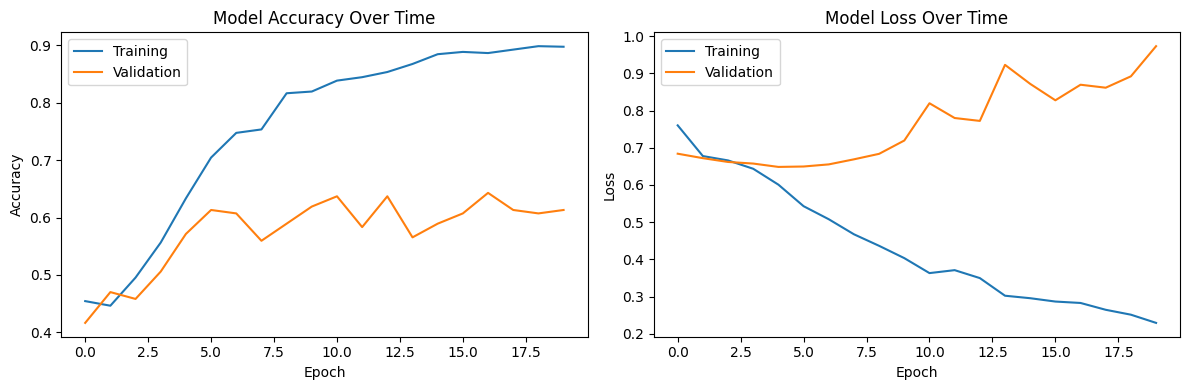

In [ ]:
# Get accuracy from training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print final accuracies
print(f"Final Training Accuracy: {train_accuracy[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracy[-1]:.4f}")

# Let's also evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Visualize the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training')
plt.plot(val_accuracy, label='Validation')
plt.title('Model Accuracy Over Time')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss Over Time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()